In [1]:
import os
import sys
print(f'cwd: {os.getcwd()}')
from datetime import datetime
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
import logging
logging.getLogger('matplotlib').setLevel(logging.WARNING)
style.use('seaborn-poster')
style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 400)
# reload imports after every cell is executed
%load_ext autoreload
%autoreload 2
# css styles
from IPython.core.display import display, HTML
display(HTML(""))

cwd: C:\Users\Danko\Dropbox\00 Programacion\00_Data_Science\01 IA_fundamentals\10_segmentacion_de_clientes\02_affinity_propagation\segundo_ejemplo


C:\Users\Danko\AppData\Local\Temp\ipykernel_2344\873850545.py:21: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:

from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets import make_blobs

# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1],[.5,.5]]

In [5]:
from pprint import pprint
def visualise_afinity_propagation(blobs_centers, afinity_propagation_params, print_clustering_metrics=False):
    X, labels_true = make_blobs(n_samples=300, centers=blobs_centers, cluster_std=0.3,
                                random_state=0)
    df_points = pd.DataFrame({
        'x': X[:,0], 
        'y': X[:,1], 
        'label': labels_true
    })
    fig, ax =plt.subplots(1,2)
    sns.scatterplot(x='x', y='y', hue='label', data=df_points, ax=ax[0])
    
    
        # Compute Affinity Propagation
    af = AffinityPropagation(**{
        'random_state':1,
        **afinity_propagation_params
    }).fit(X)
    cluster_centers_indices = af.cluster_centers_indices_
    labels = af.labels_

    n_clusters_ = len(cluster_centers_indices)
    
    if print_clustering_metrics:
        print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
        print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
        print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
        print("Adjusted Rand Index: %0.3f"
              % metrics.adjusted_rand_score(labels_true, labels))
        print("Adjusted Mutual Information: %0.3f"
              % metrics.adjusted_mutual_info_score(labels_true, labels))
        print("Silhouette Coefficient: %0.3f"
              % metrics.silhouette_score(X, labels, metric='sqeuclidean'))

        print('Afinity_propagation params:', af.get_params())

    pprint(afinity_propagation_params)
    # #############################################################################
    # Plot result

#     plt.close('all')
#     plt.figure(1)
#     plt.clf()

    colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
    for k, col in zip(range(n_clusters_), colors):
        class_members = labels == k
        cluster_center = X[cluster_centers_indices[k]]
        plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
        plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=14)
        for x in X[class_members]:
            plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()


{'damping': 0.5, 'preference': -10}


NameError: name 'cycle' is not defined

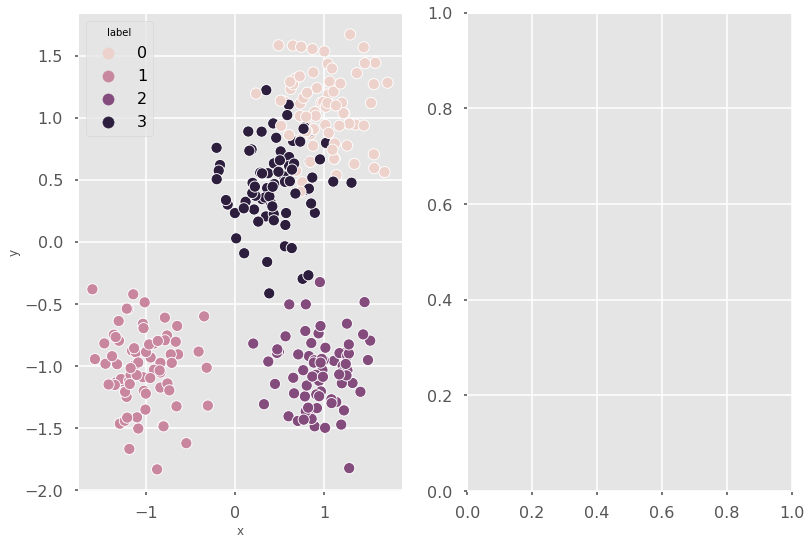

In [6]:

for damping_factor in np.linspace(.5, .9, 3):
    visualise_afinity_propagation(centers, {
        'damping': damping_factor,
        'preference': -10
    })

{'max_iter': 5000, 'preference': -10.0}


NameError: name 'cycle' is not defined

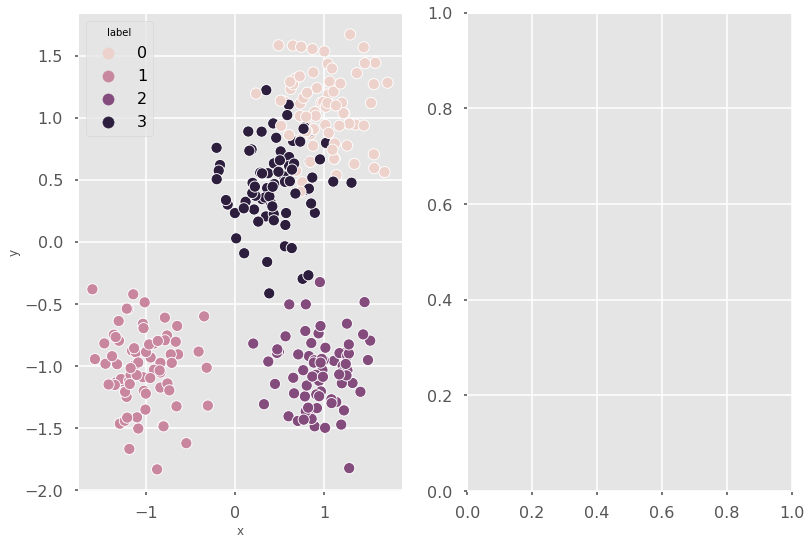

In [7]:
for preference in np.linspace(-10, -100, 5):
    visualise_afinity_propagation(centers, {
        'preference': preference,
        # increase max_iter to converge to any centers for low prference values
        'max_iter': 5000 
    })